<a href="https://colab.research.google.com/github/bohemian-miser/Spectre/blob/main/Spectre_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making Spectre tile edge markings

The spectre tile is an aperiodic monotile discovered in 2023. This project aims to create a series of patterns that sit on top of spectre tiles to create an endless pattern of _art nouveau scrollwork_.

Original Spectre Paper: https://escholarship.org/uc/item/4xn41982

It took me a while to untangle this paper. I'm not going to make too much of an effort to explain things here, my main aim is making interesting patterns.

Here are some sources.

*   Smith, D., Myers, J. S., Kaplan, C. S., & Goodman-Strauss, C. (2024). **A chiral aperiodic monotile**. *Combinatorial Theory*, *4*(2). [https://doi.org/10.5070/C64264241](https://doi.org/10.5070/C64264241)
*   Smith, D., Myers, J. S., Kaplan, C. S., & Goodman-Strauss, C. (2024). **An aperiodic monotile**. *Combinatorial Theory*, *4*(1). [https://doi.org/10.5070/C64163843](https://doi.org/10.5070/C64163843)
*   Tatham, S. (2023, June 16). **Combinatorial coordinates for the aperiodic Spectre tiling**. https://www.chiark.greenend.org.uk/~sgtatham/quasiblog/aperiodic-spectre/
* https://github.com/shrx/spectre Original python port of the interactive aplets linked from the main website https://cs.uwaterloo.ca/~csk/spectre/






(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Spectre Tile with Quad Points'}>)

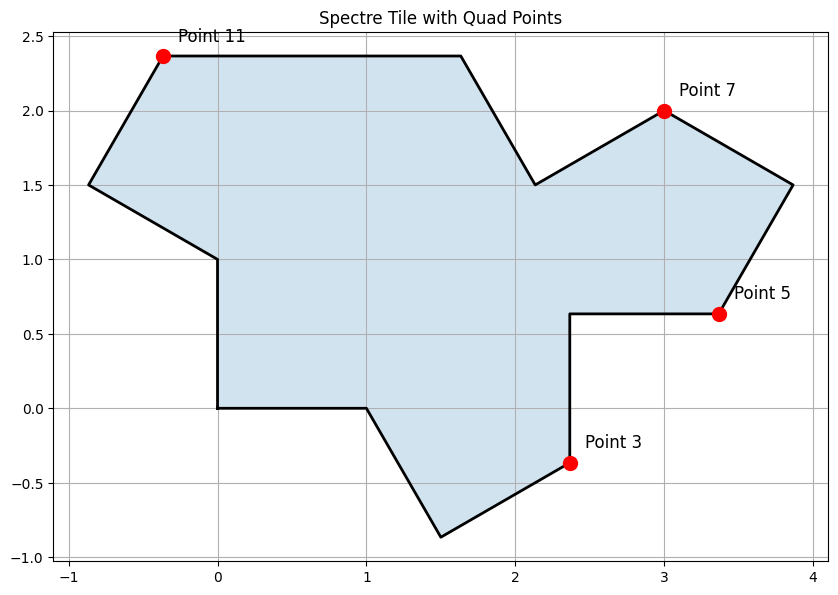

In [ ]:
#@title What is a spectre?
import matplotlib.pyplot as plt
import numpy as np

class pt:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.xy = [x, y]

# Using the same SPECTRE_POINTS definition from the original code
SPECTRE_POINTS = [
    pt(0, 0),
    pt(1.0, 0.0),
    pt(1.5, -np.sqrt(3)/2),
    pt(2.366025403784439, -0.36602540378443865),  # quad point 3
    pt(2.366025403784439, 0.6339745962155614),
    pt(3.366025403784439, 0.6339745962155614),    # quad point 5
    pt(3.866025403784439, 1.5),
    pt(3.0, 2.0),                                  # quad point 7
    pt(2.133974596215561, 1.5),
    pt(1.6339745962155614, 2.3660254037844393),
    pt(0.6339745962155614, 2.3660254037844393),
    pt(-0.3660254037844386, 2.3660254037844393),  # quad point 11
    pt(-0.866025403784439, 1.5),
    pt(0.0, 1.0)
]

def plot_spectre(show_grid=True):
    """Plot a single spectre tile"""
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Extract x and y coordinates for plotting
    x_coords = [p.x for p in SPECTRE_POINTS]
    y_coords = [p.y for p in SPECTRE_POINTS]

    # Add first point again to close the shape
    x_coords.append(SPECTRE_POINTS[0].x)
    y_coords.append(SPECTRE_POINTS[0].y)

    # Plot the spectre tile outline
    ax.plot(x_coords, y_coords, 'k-', linewidth=2)

    # Fill with a light color
    ax.fill(x_coords, y_coords, alpha=0.2)

    # Add dots and labels for quad points
    quad_indices = [3, 5, 7, 11]  # Same quad points used in Tile class
    for i in quad_indices:
        p = SPECTRE_POINTS[i]
        ax.plot(p.x, p.y, 'ro', markersize=10)  # Red dot
        ax.text(p.x + 0.1, p.y + 0.1, f'Point {i}', fontsize=12)  # Label

    # Optional grid
    if show_grid:
        ax.grid(True)
    ax.set_aspect('equal')
    ax.set_title('Spectre Tile with Quad Points')

    return fig, ax

plot_spectre()

In the above plot, I include the 'Quad Points' these are important for constructing the supertiles. The algorithm for generating larger and larger tessalations is complex and I won't go into it all here, but I will include this diagram from the paper, and my own failed attempt of trying to understand what the inplace substitution looks like.

# Why does it have to reflect?
The reflection step is very important. You could come up with an algorithm that doesn't do the reflections but you would also have to recolour the tiles (I think). The substitution is done with mapping the tiles and their substitutions to the current layout, so every second iteration you'll need to flip them. It's very complicated and you should give it a go yourself. I'll include a way to generate a nice set to play with in inkscape later.


# Side note about the proof
The proof relies on creating a set of 9 hexagons with markings that are equivilant to 8 spectre tiles + the 'Mystic' which is a 2 tile combo. I've used the edge rules of this to make my own set of 9 tiles.



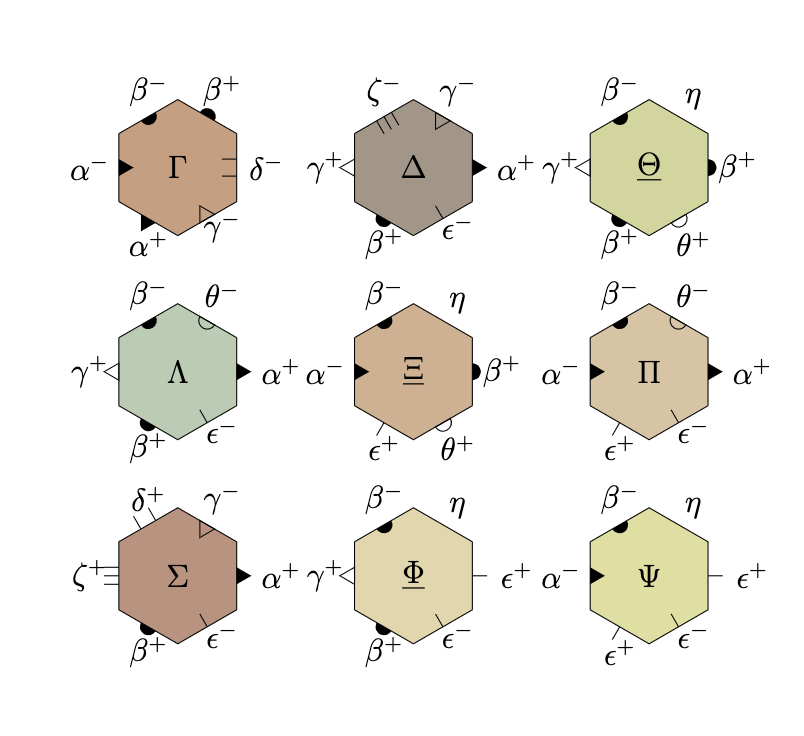

The above hexagons are taken from page 14 of https://escholarship.org/uc/item/4xn41982

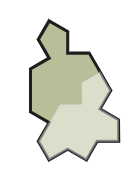

The Mystic tile is made up of 2 Gammas. I just put this here as a reference so I could work out how to number the edges.

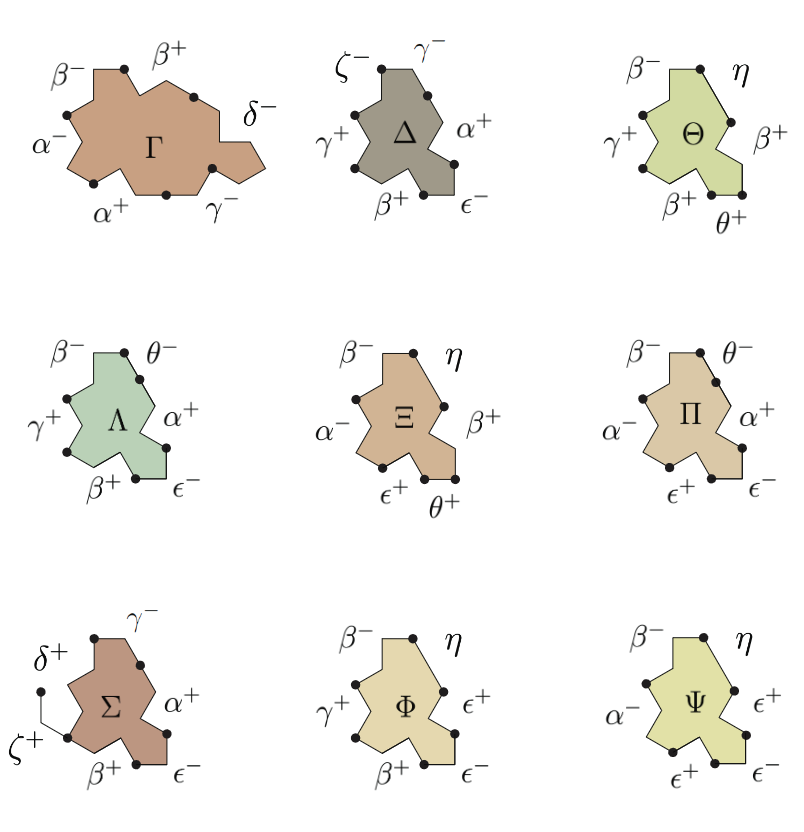

This is taken from page 20 from the paper https://escholarship.org/uc/item/4xn41982. I've translated these into numbers in the code below.

That weird zeta leg bit on Sigma is _very_ confusing. It seems like Gamma2 and Delta are the only bits that join there and the weird leg is meant to like protect the Gamma2 but changing the Gamma2 to just have zetas(-6) seems to make everything work fine.

update: I think it's so that Gamma/Mystic can still have 6 edges.

In [2]:
def plot_spectre_with_labels(label_type):
   """Plot spectre with edge markings based on type (Gamma, Lambda, etc)"""
   fig, ax = plt.subplots(figsize=(5, 5))

    # Translated from the diagram above.
    # These match the hexagons but the values are repeated for as many
    # spectre edges that are in the coresponding group.
    # The starting point is the highest ofthe leftmost points).
    # α (alpha) → 1
    # β (beta) → 2
    # γ (gamma) → 3
    # δ (delta) → 4
    # ε (epsilon) → 5
    # ζ (zeta) → 6
    # η (eta) → 0 (This is a straight line so there is no minus version)
    # θ (theta) → 8
    # Mystic internal edge → '*'

   edge_labels = {
       'Delta':  [3,3, 2,2,2, -5,-5, 1,1,1, -3,-3, -6,-6],  # Δ
       'Theta':  [3,3, 2,2,2, 8, 2,2,2, 0,0, -2,-2,-2],  # Θ
       'Lambda': [3,3, 2,2,2, -5,-5, 1,1,1, -8, -2,-2,-2],  # Λ
       'Xi':     [-1,-1,-1, 5,5, 8, 2,2,2, 0,0, -2,-2,-2],  # Ξ
       'Pi':     [-1,-1,-1, 5,5, -5,-5, 1,1,1, -8, -2,-2,-2],  # Π
       'Sigma':  [4,4, 2,2,2, -5,-5, 1,1,1, -3,-3, 4,4],  # Σ
       'Phi':    [3,3, 2,2,2, -5,-5, 5,5, 0,0, -2,-2,-2],  # Φ
       'Psi':    [-1,-1,-1, 5,5, -5,-5, 5,5, 0,0, -2,-2,-2],  # Ψ
      #  'Gamma2': [99,99, # internal start.
      #             -3,-3, -4,-4,-4,-4,-4,-4, 2,2, # joins with the below one.
      #             99,99],  # Γ Dark one? It's the one that has the head/but/tail/notch thing.
      # I changed some -4's to -6's. I can't understand why they needed that weird leg bit on Sigma when this seems to work just fine.
       'Gamma2': [-7,-7, -3,-3, -6,-6,-4,-4,-4,-4, 2,2, -7,-7],
       'Gamma1': [-1,-1,-1, 1,1,1, # joins with the above one.
                  7,7,7,7, # internal
                  2, -2,-2,-2],  # Γ
   }

   # Plot base shape
   x_coords = [p.x for p in SPECTRE_POINTS + [SPECTRE_POINTS[0]]]
   y_coords = [p.y for p in SPECTRE_POINTS + [SPECTRE_POINTS[0]]]
   ax.plot(x_coords, y_coords, 'k-', linewidth=2)

   # Get edge labels for this type
   labels = edge_labels[label_type]

   # Plot dots at vertices where edges meet
   vertices = []
   for i in range(len(labels)):
       p1 = SPECTRE_POINTS[i]
       ax.plot(p1.x, p1.y, 'ko', markersize=6)
       vertices.append((p1.x, p1.y))

       # Add edge label at midpoint
       next_i = (i + 1) % len(SPECTRE_POINTS)
       mid_x = (SPECTRE_POINTS[i].x + SPECTRE_POINTS[next_i].x) / 2
       mid_y = (SPECTRE_POINTS[i].y + SPECTRE_POINTS[next_i].y) / 2
       ax.text(mid_x, mid_y, labels[i], fontsize=12)

   ax.set_aspect('equal')
   ax.set_title(f'Spectre Tile Type: {label_type}')
   plt.show()
plot_spectre_with_labels('Gamma1')

NameError: name 'plt' is not defined

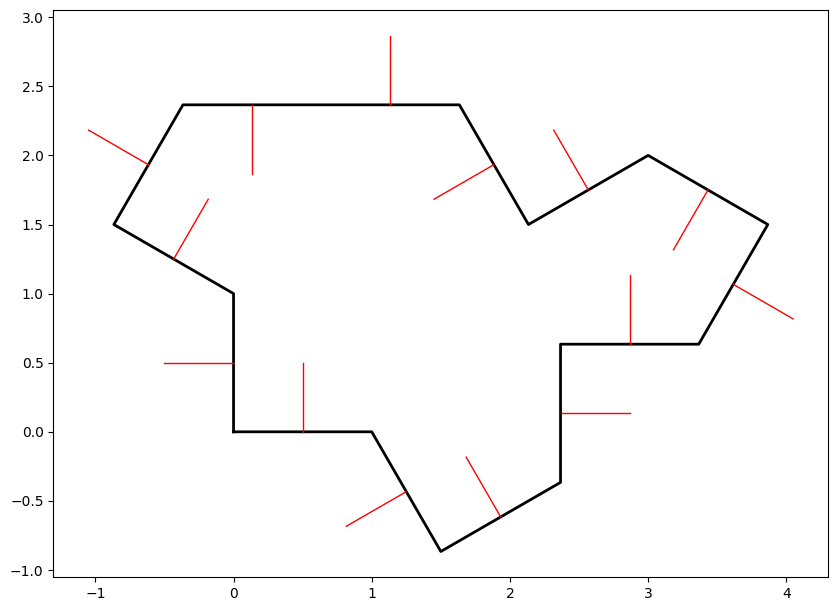

In [3]:
#@title Spike
#@markdown Typically, people make patterns by alternating every edge with an in out
#@markdown pattern but I wanted more complexity so I've used all 9 tiles instead.
#@markdown I've included this here so that people can play with it. I highly
#@markdown recommend using an LLM.
import matplotlib.pyplot as plt
import numpy as np

class pt:
   def __init__(self, x, y):
       self.x = x
       self.y = y
       self.xy = [x, y]

SPECTRE_POINTS = [
   pt(0, 0),
   pt(1.0, 0.0),
   pt(1.5, -np.sqrt(3)/2),
   pt(2.366025403784439, -0.36602540378443865),
   pt(2.366025403784439, 0.6339745962155614),
   pt(3.366025403784439, 0.6339745962155614),
   pt(3.866025403784439, 1.5),
   pt(3.0, 2.0),
   pt(2.133974596215561, 1.5),
   pt(1.6339745962155614, 2.3660254037844393),
   pt(0.6339745962155614, 2.3660254037844393),
   pt(-0.3660254037844386, 2.3660254037844393),
   pt(-0.866025403784439, 1.5),
   pt(0.0, 1.0)
]

def get_perpendicular(p1, p2, length=0.5, outward=True):
   """Calculate perpendicular line at midpoint"""
   # Find midpoint
   mid_x = (p1.x + p2.x) / 2
   mid_y = (p1.y + p2.y) / 2

   # Calculate perpendicular vector
   dx = p2.x - p1.x
   dy = p2.y - p1.y
   # Perpendicular vector (-dy, dx)
   perp_x = -dy
   perp_y = dx

   # Normalize
   norm = np.sqrt(perp_x**2 + perp_y**2)
   perp_x = perp_x / norm * length
   perp_y = perp_y / norm * length

   if not outward:
       perp_x = -perp_x
       perp_y = -perp_y

   return [mid_x, mid_x + perp_x], [mid_y, mid_y + perp_y]

def plot_spectre():
   fig, ax = plt.subplots(figsize=(10, 10))

   # Plot base shape
   x_coords = [p.x for p in SPECTRE_POINTS + [SPECTRE_POINTS[0]]]
   y_coords = [p.y for p in SPECTRE_POINTS + [SPECTRE_POINTS[0]]]
   ax.plot(x_coords, y_coords, 'k-', linewidth=2)

   # Add perpendicular lines at midpoints
   for i in range(len(SPECTRE_POINTS)):
       p1 = SPECTRE_POINTS[i]
       p2 = SPECTRE_POINTS[(i + 1) % len(SPECTRE_POINTS)]
       x_perp, y_perp = get_perpendicular(p1, p2, outward=(i % 2 == 0))
       ax.plot(x_perp, y_perp, 'r-', linewidth=1)

   ax.set_aspect('equal')
   plt.show()

plot_spectre()

# Constructing supertiles

In [4]:
!pip install drawsvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.1 MB/s eta 0:00:00


In [5]:
#@title Helpers: scale_drawing and flip
def scale_drawing(d, scale_factor=1.5):
    """Scale an entire drawing by applying a scale transform."""
    scaled = draw.Group(transform=f'scale({scale_factor})')
    for elem in d.elements:
        scaled.append(elem)

    # Create new drawing with scaled dimensions
    new_d = draw.Drawing(
        d.width, #* scale_factor,
        d.height,# * scale_factor,
        # origin=d.origin
        origin="center"
    )
    new_d.append(scaled)
    return new_d

def flip(d):
  d2 = draw.Drawing(1024, 1024, origin="center")
  flip_transform = draw.Group(transform='scale(-1, 1)')
  for elem in d.elements:
      flip_transform.append(elem)
  d2.append(flip_transform)
  return d2

In [6]:
#@title from github [Heavily modified]
# https://github.com/shrx/spectre

import numpy as np
from IPython.display import SVG, display
import drawsvg as draw
from time import time
import os

# Configurable parameter
N_ITERATIONS = 2  # Reduced from 3 to start, can be increased

num_tiles = 0

IDENTITY = [1, 0, 0, 0, 1, 0]

TILE_NAMES = ["Gamma", "Delta", "Theta", "Lambda", "Xi", "Pi", "Sigma", "Phi", "Psi"]

COLOR_MAP = {
    "Gamma":  "rgb(210, 40, 130)",
    "Gamma1": "rgb(210, 40, 130)",
    "Gamma2": "rgb(210, 40, 130)",
    "Delta":  "rgb(220, 220, 220)",
    "Theta":  "rgb(255, 191, 191)",
    "Lambda": "rgb(255, 160, 122)",
    "Xi":     "rgb(255, 242, 0)",
    "Pi":     "rgb(135, 206, 250)",
    "Sigma":  "rgb(245, 245, 220)",
    "Phi":    "rgb(0, 255, 0)",
    "Psi":    "rgb(0, 255, 255)"
}

class pt:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.xy = [x, y]

# Define spectre points with exact coordinates
SPECTRE_POINTS = [
    pt(0, 0),
    pt(1.0, 0.0),
    pt(1.5, -np.sqrt(3)/2),
    pt(1.5+np.sqrt(3)/2, 0.5-np.sqrt(3)/2),
    pt(1.5+np.sqrt(3)/2, 1.5-np.sqrt(3)/2),
    pt(2.5+np.sqrt(3)/2, 1.5-np.sqrt(3)/2),
    pt(3+np.sqrt(3)/2, 1.5),
    pt(3.0, 2.0),
    pt(3-np.sqrt(3)/2, 1.5),
    pt(2.5-np.sqrt(3)/2, 1.5+np.sqrt(3)/2),
    pt(1.5-np.sqrt(3)/2, 1.5+np.sqrt(3)/2),
    pt(0.5-np.sqrt(3)/2, 1.5+np.sqrt(3)/2),
    pt(-np.sqrt(3)/2, 1.5),
    pt(0.0, 1.0)
]

def flatten(lst):
    return [item for sublist in lst for item in sublist]

SPECTRE_SHAPE = draw.Lines(*flatten([p.xy for p in SPECTRE_POINTS]), close=True)

def mul(A, B):
    """Affine matrix multiply"""
    return [
        A[0]*B[0] + A[1]*B[3],
        A[0]*B[1] + A[1]*B[4],
        A[0]*B[2] + A[1]*B[5] + A[2],
        A[3]*B[0] + A[4]*B[3],
        A[3]*B[1] + A[4]*B[4],
        A[3]*B[2] + A[4]*B[5] + A[5]
    ]

def trot(ang):
    """Rotation matrix"""
    c = np.cos(ang)
    s = np.sin(ang)
    return [c, -s, 0,
            s, c, 0]

def ttrans(tx, ty):
    """Translation matrix"""
    return [1, 0, tx,
            0, 1, ty]

def transTo(p, q):
    return ttrans(q.x - p.x, q.y - p.y)

def transPt(M, P):
    """Matrix * point"""
    return pt(M[0]*P.x + M[1]*P.y + M[2], M[3]*P.x + M[4]*P.y + M[5])


def get_midpoint(p1, p2):
   """Get midpoint between two points"""
   return ((p1.x + p2.x)/2, (p1.y + p2.y)/2)

def get_edge_labels(tile_type):
   """Return edge labels for a given tile type"""
   return {
       'Delta':  [3,3, 2,2,2, -5,-5, 1,1,1, -3,-3, -6,-6],  # Δ
       'Theta':  [3,3, 2,2,2, 8, 2,2,2, 0,0, -2,-2,-2],  # Θ
       'Lambda': [3,3, 2,2,2, -5,-5, 1,1,1, -8, -2,-2,-2],  # Λ
       'Xi':     [-1,-1,-1, 5,5, 8, 2,2,2, 0,0, -2,-2,-2],  # Ξ
       'Pi':     [-1,-1,-1, 5,5, -5,-5, 1,1,1, -8, -2,-2,-2],  # Π
       'Sigma':  [4,4, 2,2,2, -5,-5, 1,1,1, -3,-3, 4,4],  # Σ
       'Phi':    [3,3, 2,2,2, -5,-5, 5,5, 0,0, -2,-2,-2],  # Φ
       'Psi':    [-1,-1,-1, 5,5, -5,-5, 5,5, 0,0, -2,-2,-2],  # Ψ
       'Gamma2': [-7,-7, -3,-3, -6,-6, -4,-4,-4,-4, 2,2, -7,-7],
       'Gamma1': [-1,-1,-1, 1,1,1, # joins with the above one.
                  7,7,7,7, # internal
                  2, -2,-2,-2],  # Γ
   }[tile_type]

def get_inset_point(p1, p2, inset=.3):
   """Get point that's inset from midpoint perpendicular to edge"""
   mid_x = (p1.x + p2.x)/2
   mid_y = (p1.y + p2.y)/2

   # Vector along edge
   dx = p2.x - p1.x
   dy = p2.y - p1.y

   # Perpendicular vector (rotate 90° counterclockwise)
   perp_x = -dy
   perp_y = dx

   # Normalize and scale
   length = np.sqrt(perp_x**2 + perp_y**2)
   perp_x = perp_x/length * inset
   perp_y = perp_y/length * inset

   return (mid_x + perp_x, mid_y + perp_y)

def drawPolygon(drawing, T, fill, _stroke, _stroke_w, label):
   """Draw a polygon with transformation and edge labels"""
   group = draw.Group(
       transform=f"matrix({T[0]} {T[3]} {T[1]} {T[4]} {T[2]} {T[5]})"
   )

   # Base shape
   group.append(draw.Use(
       SPECTRE_SHAPE,
       0, 0,
       fill=fill,
       stroke=_stroke,
       stroke_width=_stroke_w if _stroke else 0))

   # Add label
   group.append(draw.Text(
       label,
       .4,
       1.5, 1.0,
       text_anchor="middle",
       fill="red",
       dominant_baseline="middle"
   ))

   # Add edge labels
   edge_labels = get_edge_labels(label)
   for i in range(len(SPECTRE_POINTS)):
       p1 = SPECTRE_POINTS[i]
       p2 = SPECTRE_POINTS[(i + 1) % len(SPECTRE_POINTS)]
       label_x, label_y = get_inset_point(p1, p2)

       group.append(draw.Text(
           str(edge_labels[i]),
           0.35,  # Font size
           label_x, label_y,
           text_anchor="middle",
           fill="red",
           dominant_baseline="middle"
       ))

   drawing.append(group)





class Tile:
    def __init__(self, pts, label):
        self.quad = [pts[3], pts[5], pts[7], pts[11]]
        self.label = label

    def draw(self, drawing, tile_transformation=IDENTITY, sw=0.1):
        global num_tiles
        num_tiles += 1
        return drawPolygon(drawing, tile_transformation, COLOR_MAP[self.label], "black", sw, self.label)

class MetaTile:
    def __init__(self, geometries=[], quad=[]):
        self.geometries = geometries
        self.quad = quad

    def draw(self, drawing, metatile_transformation=IDENTITY):
        for shape, shape_transformation in self.geometries:
            shape.draw(drawing, mul(metatile_transformation, shape_transformation))


def buildSpectreBase():
    """Build the base set of spectre tiles"""
    spectre_base_cluster = {
        label: Tile(SPECTRE_POINTS, label)
        for label in TILE_NAMES
        if label != "Gamma"
    }

    # Special rule for Gamma
    mystic = MetaTile(
        [
            [Tile(SPECTRE_POINTS, "Gamma1"), IDENTITY],
            [Tile(SPECTRE_POINTS, "Gamma2"),
             mul(ttrans(SPECTRE_POINTS[8].x, SPECTRE_POINTS[8].y), trot(np.pi/6))]
        ],
        [SPECTRE_POINTS[3], SPECTRE_POINTS[5], SPECTRE_POINTS[7], SPECTRE_POINTS[11]]
    )
    spectre_base_cluster["Gamma"] = mystic
    return spectre_base_cluster

def buildSupertiles(tileSystem):
    """Build the next level of supertiles"""
    quad = tileSystem["Delta"].quad
    R = [-1, 0, 0, 0, 1, 0] # This flips in the x plane.

    transformation_rules = [
        [60, 3, 1], [0, 2, 0], [60, 3, 1], [60, 3, 1],
        [0, 2, 0], [60, 3, 1], [-120, 3, 3]
    ]

    transformations = [IDENTITY]
    total_angle = 0
    rotation = IDENTITY
    transformed_quad = list(quad)

    for _angle, _from, _to in transformation_rules:
        if(_angle != 0):
            total_angle += _angle
            rotation = trot(np.deg2rad(total_angle))
            transformed_quad = [transPt(rotation, quad_pt) for quad_pt in quad]

        ttt = transTo(
            transformed_quad[_to],
            transPt(transformations[-1], quad[_from])
        )
        transformations.append(mul(ttt, rotation))

    transformations = [mul(R, transformation) for transformation in transformations]

    super_rules = {
        "Gamma":  ["Pi", "Delta", None, "Theta", "Sigma", "Xi", "Phi", "Gamma"],
        "Delta":  ["Xi", "Delta", "Xi", "Phi", "Sigma", "Pi", "Phi", "Gamma"],
        "Theta":  ["Psi", "Delta", "Pi", "Phi", "Sigma", "Pi", "Phi", "Gamma"],
        "Lambda": ["Psi", "Delta", "Xi", "Phi", "Sigma", "Pi", "Phi", "Gamma"],
        "Xi":     ["Psi", "Delta", "Pi", "Phi", "Sigma", "Psi", "Phi", "Gamma"],
        "Pi":     ["Psi", "Delta", "Xi", "Phi", "Sigma", "Psi", "Phi", "Gamma"],
        "Sigma":  ["Xi", "Delta", "Xi", "Phi", "Sigma", "Pi", "Lambda", "Gamma"],
        "Phi":    ["Psi", "Delta", "Psi", "Phi", "Sigma", "Pi", "Phi", "Gamma"],
        "Psi":    ["Psi", "Delta", "Psi", "Phi", "Sigma", "Psi", "Phi", "Gamma"]
    }

    super_quad = [
        transPt(transformations[6], quad[2]),
        transPt(transformations[5], quad[1]),
        transPt(transformations[3], quad[2]),
        transPt(transformations[0], quad[1])
    ]

    return {
        label: MetaTile(
            [[tileSystem[sub], trans]
             for sub, trans in zip(subs, transformations) if sub],
            super_quad
        ) for label, subs in super_rules.items()
    }

def generate_spectre_tiling_drawing(iterations=N_ITERATIONS, tile_type="Delta"):
    """Generate and display a spectre tiling"""
    global num_tiles
    num_tiles = 0

    # Create drawing with origin at center
    d = draw.Drawing(500, 500, origin="center")

    shapes = buildSpectreBase()
    for _ in range(iterations):
        shapes = buildSupertiles(shapes)
    shapes[tile_type].draw(d)
    return d

def generate_spectre_tiling(iterations=N_ITERATIONS, tile_type="Delta"):
    # Display the SVG using a temporary file
    d = generate_spectre_tiling_drawing(iterations, tile_type)
    save_drawing(d)

def save_drawing(d, name="blerg"):
    # Create a temporary file
    # with tempfile.NamedTemporaryFile(suffix='.svg', delete=False) as tmp:
    temp_filename = f'/content/{name}.svg'
    with open(temp_filename, 'w') as tmp:
      d.save_svg(temp_filename)

    # Read the SVG file content
    with open(temp_filename, 'r') as f:
        svg_content = f.read()

    # Display the SVG
    display(SVG(svg_content))
# generate_spectre_tiling(2)

In [7]:
# Make a new drawing.
d = draw.Drawing(500, 500, origin="center")
shapes = buildSpectreBase()

In [8]:
# Run this again to build the next iteration of supertiles.
shapes = buildSupertiles(shapes)

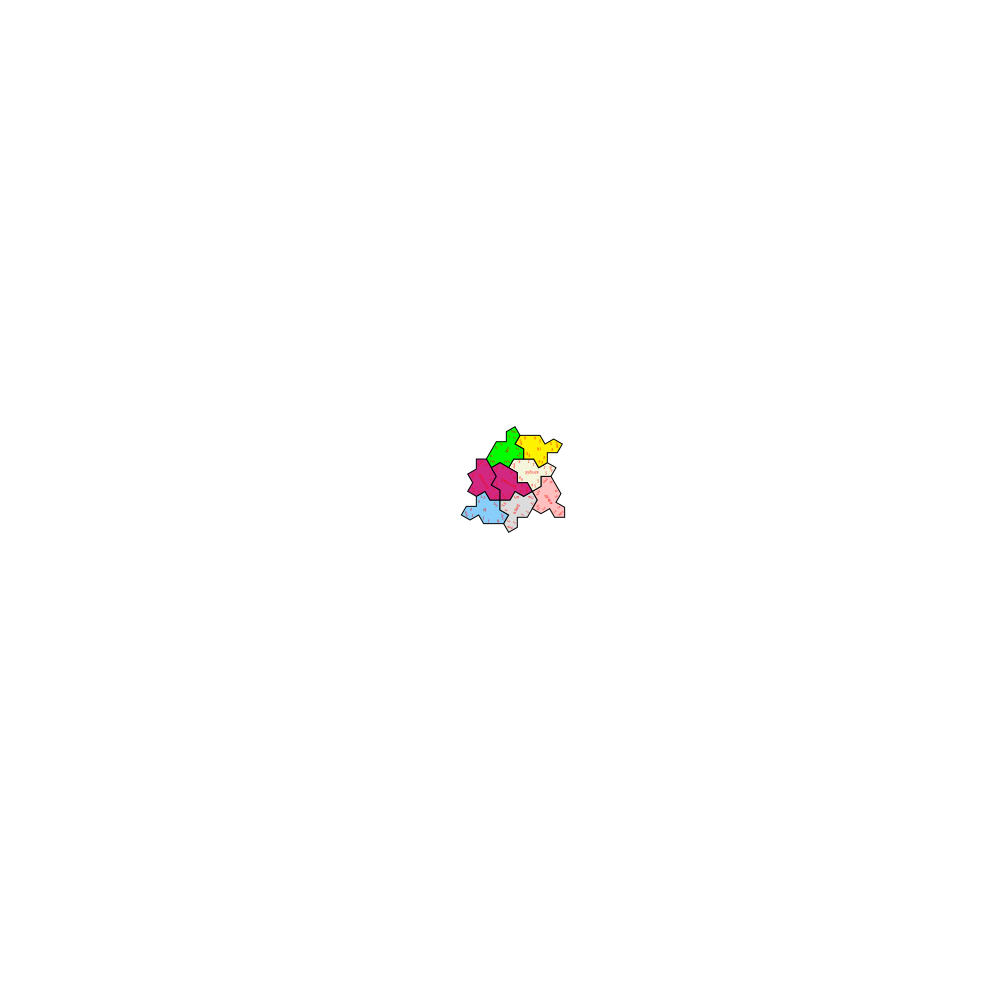

In [9]:
# Render the tiles.
d = draw.Drawing(1000, 1000, origin="center")
shapes["Gamma"].draw(d)
# This is a rather hacky way of making it bigger, you might need to adjust the size above and the scale factor.
# Please do let me know if you write a helper that centres things properly. I gave up..
m = scale_drawing(d, scale_factor=10)
save_drawing(m,name="blerg")

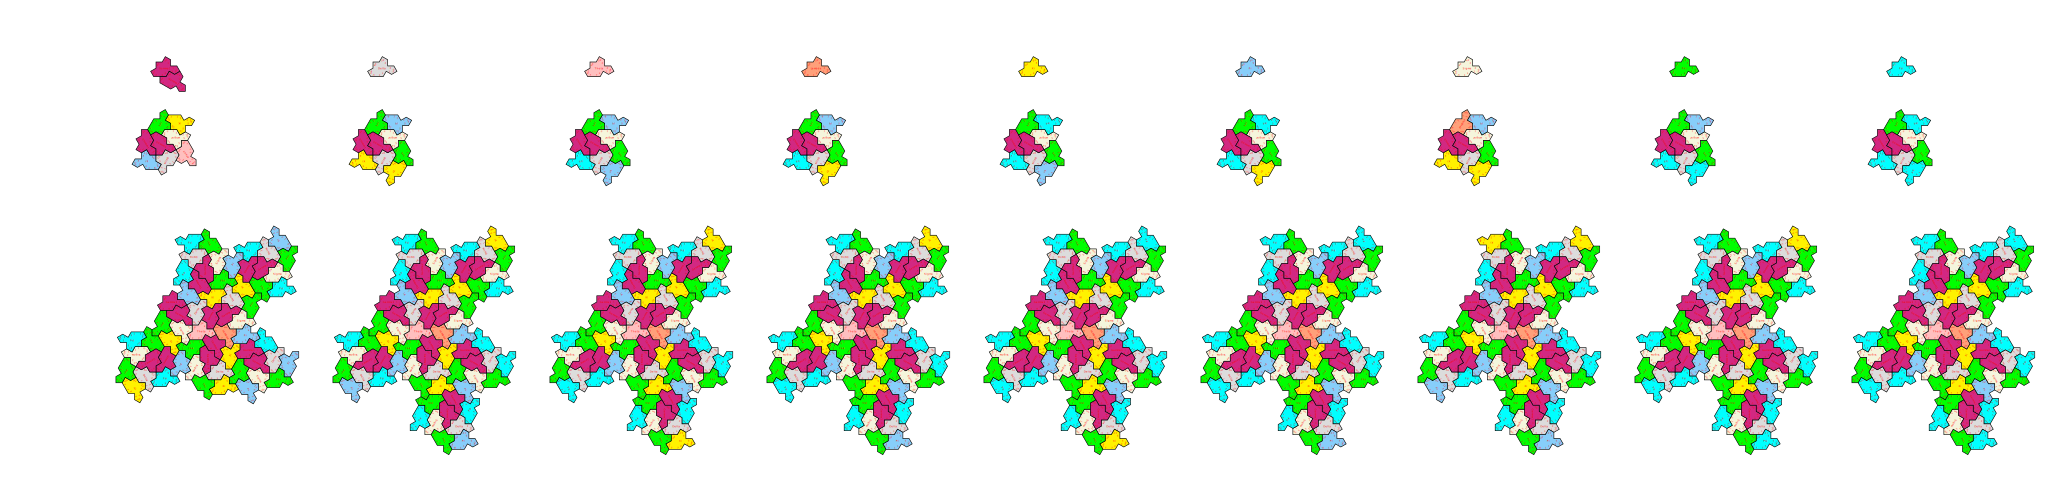

In [ ]:
#@title Draw 3 iterations of expansion.
def draw_tile_grid():
   d = draw.Drawing(3300, 800, origin="center")

   # Layout in a single row
   tile_types = ['Gamma', 'Delta', 'Theta', 'Lambda', 'Xi', 'Pi', 'Sigma', 'Phi', 'Psi']
   spacing = 35  # Horizontal spacing between tiles

   shapes = buildSpectreBase()
   shapes2 = buildSupertiles(shapes)
   shapes3 = buildSupertiles(shapes2)

   # Calculate starting x to center the row
   start_x = -((len(tile_types) - 1) * spacing) *0.5

   for i, tile_type in enumerate(tile_types):
       # First iteration.
       translate = [1, 0, start_x + (i * spacing), 0, 1, -30]
       shapes[tile_type].draw(d, translate)
       # Second iteration.
       translate = [1, 0, start_x + (i * spacing), 0, 1, 15-30]
       shapes2[tile_type].draw(d, translate)
       # Third iteration.
       translate = [1, 0, start_x + (i * spacing), 0, 1, 15*2-10]
       shapes3[tile_type].draw(d, translate)

   m = scale_drawing(d, scale_factor=10)
   save_drawing(m, name="All expansions")
   return m

# Seriously, try and line these up in inkscape or print and cut them out,
# it's harder than you'd think.
draw_tile_grid()
print() # So it doesn't display twice.

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Spectre Tile with Labeled Points'}>)

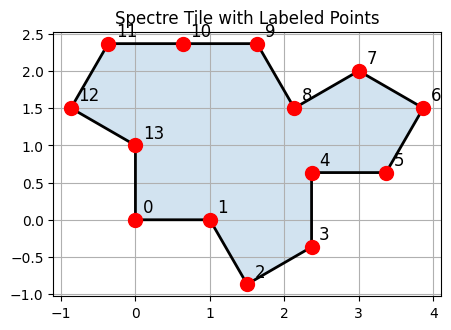

In [ ]:
#@title Reference image.
import matplotlib.pyplot as plt
import numpy as np

class pt:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.xy = [x, y]

# Using the same SPECTRE_POINTS definition from the original code
SPECTRE_POINTS = [
    pt(0, 0),
    pt(1.0, 0.0),
    pt(1.5, -np.sqrt(3)/2),
    pt(2.366025403784439, -0.36602540378443865),  # quad point 3
    pt(2.366025403784439, 0.6339745962155614),
    pt(3.366025403784439, 0.6339745962155614),    # quad point 5
    pt(3.866025403784439, 1.5),
    pt(3.0, 2.0),                                  # quad point 7
    pt(2.133974596215561, 1.5),
    pt(1.6339745962155614, 2.3660254037844393),
    pt(0.6339745962155614, 2.3660254037844393),
    pt(-0.3660254037844386, 2.3660254037844393),  # quad point 11
    pt(-0.866025403784439, 1.5),
    pt(0.0, 1.0)
]

def plot_spectre(show_grid=True):
    """Plot a single spectre tile"""
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(5, 5))

    # Extract x and y coordinates for plotting
    x_coords = [p.x for p in SPECTRE_POINTS]
    y_coords = [p.y for p in SPECTRE_POINTS]

    # Add first point again to close the shape
    x_coords.append(SPECTRE_POINTS[0].x)
    y_coords.append(SPECTRE_POINTS[0].y)

    # Plot the spectre tile outline
    ax.plot(x_coords, y_coords, 'k-', linewidth=2)

    # Fill with a light color
    ax.fill(x_coords, y_coords, alpha=0.2)

    # Add dots and labels for quad points
    # quad_indices = [3, 5, 7, 11]  # Same quad points used in Tile class
    for i in range(len(SPECTRE_POINTS)):
        p = SPECTRE_POINTS[i]
        ax.plot(p.x, p.y, 'ro', markersize=10)  # Red dot
        ax.text(p.x + 0.1, p.y + 0.1, f'{i}', fontsize=12)  # Label

    # Optional grid
    if show_grid:
        ax.grid(True)
    ax.set_aspect('equal')
    ax.set_title('Spectre Tile with Labeled Points')

    return fig, ax

plot_spectre()

# Making patterns.
To make things simple for me to play with, I made a helper function that drew lines between points on the spectre tiles. See the labeled pointsabove for reference to which point is which in `SPECTRE_POINTS`.

You can modify `drawPolygon` as much as you like and everything will still (probably) work. I've included some helpful bools you can change and re-run. It would be unnecessary hassle to pass them in as flags so just modify the code.

    # Edit these to control what's rendered.
    show_base = True           # The spectre shape.
    show_text = False          # Text in the centre e.g. 'Gamma'.
    show_edge_numbers = False  # These numbers must match adjacent tiles.
    show_pattern = False       # The patterns dictated by 'PATTERN_FUNCTIONS'.
    show_lines_to_edge = False # Create lines from the centre of each tile to each edge.





In [15]:
#@title Improved drawPolygon function.
def between_points(point_pairs, stroke_color='black', stroke_width=0.1, dash_array='0.2'):
    """
    Returns a function that draws lines between specified pairs of points using global SPECTRE_POINTS.

    Args:
        point_pairs (list): List of tuples containing pairs of point indices to connect
        stroke_color (str): Color of the lines (default: 'darkred')
        stroke_width (float): Width of the lines (default: 0.1)
        dash_array (str): SVG dash array pattern (default: '0.2')

    Returns:
        function: A drawing function compatible with the pattern mapping system
    """
    def pattern_drawer(group,stroke):
        for start_idx, end_idx in point_pairs:
            start_point = SPECTRE_POINTS[start_idx]
            end_point = SPECTRE_POINTS[end_idx]

            group.append(draw.Line(
                start_point.x, start_point.y,
                end_point.x, end_point.y,
                stroke=stroke,
                stroke_width=stroke_width,
                #stroke_dasharray=dash_array
            ))
    return pattern_drawer


def drawPolygon(drawing, T, fill, _stroke, _stroke_w, label):
    """Draw a polygon with transformation and edge labels"""
    group = draw.Group(
        transform=f"matrix({T[0]} {T[3]} {T[1]} {T[4]} {T[2]} {T[5]})"
    )
    # Edit these to control what's rendered.
    show_base = True           # The spectre shape.
    show_text = True          # Text in the centre e.g. 'Gamma'.
    show_edge_numbers = True  # These numbers must match adjacent tiles.
    show_pattern = True       # The patterns dictated by 'PATTERN_FUNCTIONS'.
    show_lines_to_edge = False # Create lines from the centre of each tile to each edge.
    if show_base:

      # Base shape
      group.append(draw.Use(
          SPECTRE_SHAPE,
          0, 0,
          fill=fill,
          stroke=_stroke,
          stroke_width=_stroke_w if _stroke else 0))

    if show_text:
      group.append(draw.Text(
          label,
          .4,
          1.5, 1.0,
          text_anchor="middle",
          fill="black",
          dominant_baseline="middle"
      ))

    if show_edge_numbers:
      edge_labels = get_edge_labels(label)
      for i in range(len(SPECTRE_POINTS)):
          p1 = SPECTRE_POINTS[i]
          p2 = SPECTRE_POINTS[(i + 1) % len(SPECTRE_POINTS)]
          label_x, label_y = get_inset_point(p1, p2)

          group.append(draw.Text(
              str(edge_labels[i]),
              0.35,  # Font size
              label_x, label_y,
              text_anchor="middle",
              fill="red",
              dominant_baseline="middle"
          ))
    if show_lines_to_edge:
      # Lines from center to edge midpoints and labels
      edge_labels = get_edge_labels(label)
      for i in range(len(SPECTRE_POINTS)):
          p1 = SPECTRE_POINTS[i]
          p2 = SPECTRE_POINTS[(i + 1) % len(SPECTRE_POINTS)]

          # Edge midpoint
          mid_x = (p1.x + p2.x) / 2
          mid_y = (p1.y + p2.y) / 2

          # Line from center to midpoint
          group.append(draw.Line(
              1.5, 1.0,  # center
              mid_x, mid_y,  # midpoint
              # reuse tile colours.
              stroke=COLOR_MAP[TILE_NAMES[abs(edge_labels[i])]],
              stroke_width=0.02
          ))

          # Label
          label_x, label_y = get_inset_point(p1, p2)
          group.append(draw.Text(
              str(edge_labels[i]),
              0.15,
              label_x, label_y,
              text_anchor="middle",
              #  fill="red",
              fill=COLOR_MAP[TILE_NAMES[abs(edge_labels[i])]],
              dominant_baseline="middle"
          ))

    # Add tile-specific pattern if it exists
    if show_pattern and label in PATTERN_FUNCTIONS:
        PATTERN_FUNCTIONS[label](group,"black")
        # Use to have colourfull lines, but make sure to disable show_base
        # since it's the same colour.
        # PATTERN_FUNCTIONS[label](group,fill)

    drawing.append(group)

Here is the mapping of the patterns for each tile. In the simple example here, this would generate a line between points 5 and 7 for sigma tiles. This would look like a line across the 'head' of the septre tile.

    PATTERN_FUNCTIONS = {
        'Sigma': between_points([(5,7)]),
        ...
    }
# Working with the edge numbers.
To create a successfull pattern, you need to enable `show_edge_numbers` in `drawPolygon` and pay attention to the edges. See in this image, how the 2's form this kind of edge, and the 0's and 5's form different meta edges. All the '2's and '-2's must have compatible interfaces. 0 matches with 0.


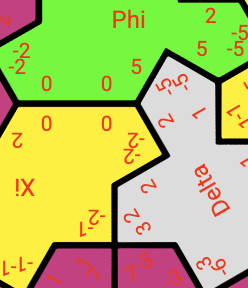



Try some of the edge patterns I've created below. Modify them and then see how the larger image changes.

In [11]:
# Map of tile types to their pattern drawing functions
# 2,5,8 joinings.
PATTERN_FUNCTIONS = {
    'Sigma': between_points([(6,4)]),
    'Psi': between_points([(4,12), (8,6)]),
    'Phi': between_points([  (12,4), (6,8)]),
    'Gamma2': between_points([ ]),
    'Delta': between_points([(4,6)]),
    'Theta': between_points([(4,6), (12,8)]),
    'Gamma1': between_points([(10,12) ]),
    'Pi': between_points([ (6,4), (12,10)]),
    'Lambda': between_points([(12,10), (4,6)]),
    'Xi': between_points([ (12,8), (4,6)]),
}

In [12]:
# Map of tile types to their pattern drawing functions


# every face has 6 meta edges, but mystic has 7 this presents a challenge.
# When I initially wrote this I messed up the Mystic. I've included this here
# for Peter who I cut using this pattern .. sorry ..
# You need to imagine that the line in the sigma tile bounces off of the mystic
# instead of passing through.

# Start with just adding lines for all tiles that have pairs of a meta edge,
# e.g. 2 '2' groups (doesn't matter if they are + or -) then when you get stuck
# try and work out the minimum extra meta edges you need to add to make it valid.


# 2,5,8, 1,3,6,7,4,0 joinings.
# 1 outtie
# 2 innie
PATTERN_FUNCTIONS = {
   'Sigma': between_points([(6,4), (11,13), (13,9)]),
    'Psi': between_points([(10,12), (8,6), (1,4)]),
    'Phi': between_points([  (1,4), (6,8),  (12,10)]),
    'Gamma2': between_points([(12,5) , (13,3)]),
    'Delta': between_points([(4,6),   (1,9), (13,11)]),
    'Theta': between_points([(4,6), (8,1),   (10,12)]),    #
    'Gamma1': between_points([(12, 9) ,    (1,8), (5,8)]),
    'Pi': between_points([ (6,4), (12,10),  (1,9)]),
    'Lambda': between_points([(12,10), (4,6),    (1,9)]),
    'Xi': between_points([ (12,10), (4,6),    (1,8)]),
}

In [13]:
# Fixed. Kinda, the Mystic still has a bad bit where 3 lines meet.
PATTERN_FUNCTIONS = {
   'Sigma': between_points([(6,4), (11,13), (13,9)]),
    'Psi': between_points([(10,12), (8,6), (1,4)]),
    'Phi': between_points([  (1,4), (6,8),  (12,10)]),
    'Gamma2': between_points([(12,9) , (13,5), (1,3)]),
    'Delta': between_points([(4,6),   (1,9), (13,11)]),
    'Theta': between_points([(4,6), (8,1),   (10,12)]),    #
    'Gamma1': between_points([(12, 9) ,    (1,7), (5,7)]),
    'Pi': between_points([ (6,4), (12,10),  (1,9)]),
    'Lambda': between_points([(12,10), (4,6),    (1,9)]),
    'Xi': between_points([ (12,10), (4,6),    (1,8)]),
}

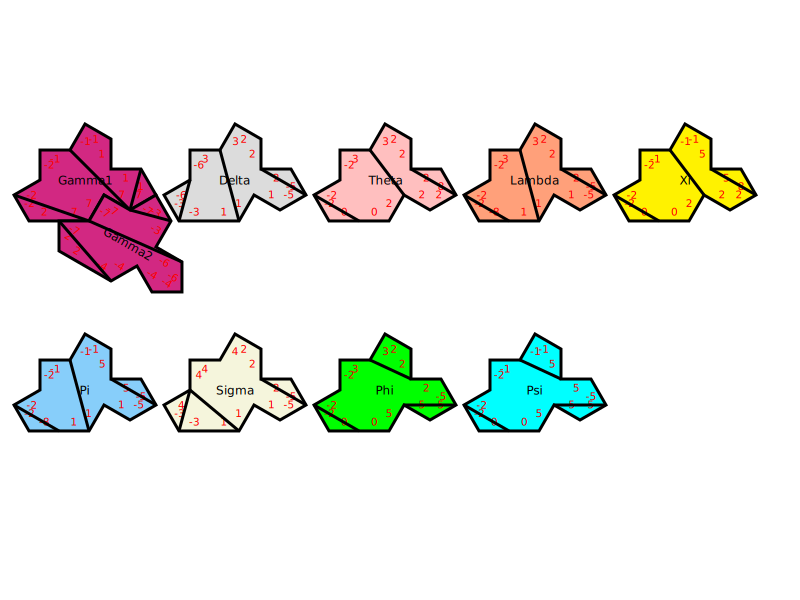

In [16]:
def draw_tile_grid():
   d = draw.Drawing(800, 600, origin="center")
   tile_types = ['Gamma', 'Delta', 'Theta', 'Lambda', 'Xi', 'Pi', 'Sigma', 'Phi', 'Psi']
   spacing = 5  # Horizontal
   shapes = buildSpectreBase()
   start_x = -((len(tile_types) - 1) * spacing) *0.5 +8
   for i, tile_type in enumerate(tile_types):
       extra = -5 if i <5 else 2
       translate = [1, 0, start_x + (i%5 * spacing), 0, 1, extra]
       shapes[tile_type].draw(d, translate)
   m = scale_drawing(d, scale_factor=30)
   return m
save_drawing(draw_tile_grid())

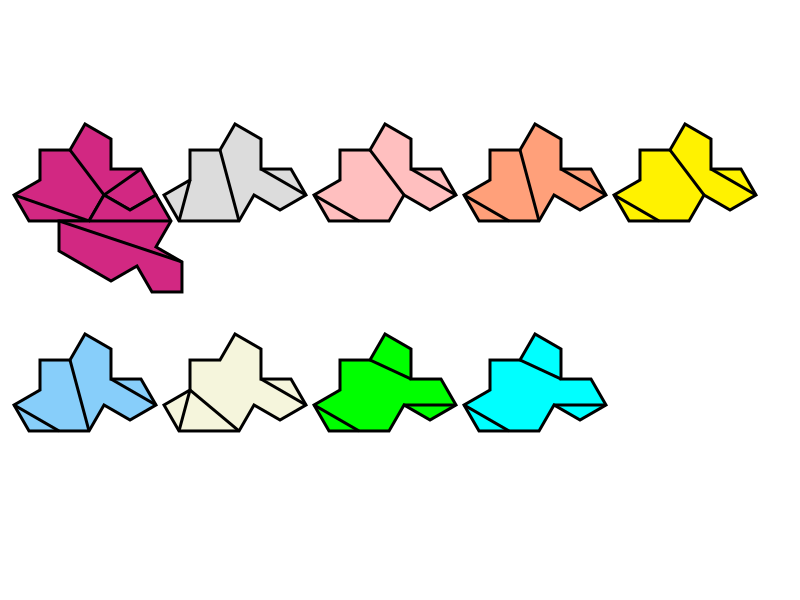

In [ ]:
# This is a copy paste of above, but I modified drawPolygon between runs.
def draw_tile_grid():
   d = draw.Drawing(800, 600, origin="center")
   tile_types = ['Gamma', 'Delta', 'Theta', 'Lambda', 'Xi', 'Pi', 'Sigma', 'Phi', 'Psi']
   spacing = 5  # Horizontal
   shapes = buildSpectreBase()
   start_x = -((len(tile_types) - 1) * spacing) *0.5 +8
   for i, tile_type in enumerate(tile_types):
       extra = -5 if i <5 else 2
       translate = [1, 0, start_x + (i%5 * spacing), 0, 1, extra]
       shapes[tile_type].draw(d, translate)
   m = scale_drawing(d, scale_factor=30)
   return m
save_drawing(draw_tile_grid())

In [18]:
# Create drawing with origin at center
d = draw.Drawing(500, 500, origin="center")
shapes = buildSpectreBase()

In [19]:
shapes = buildSupertiles(shapes)

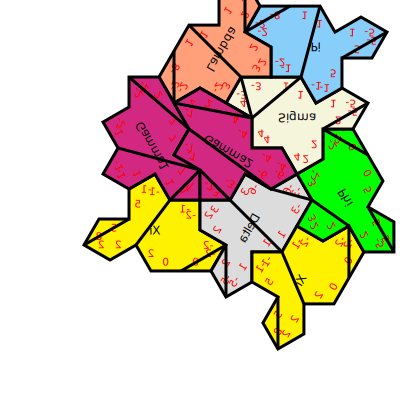

In [21]:
# Large white Pattern.
d = draw.Drawing(400, 400, origin="center")
shapes["Sigma"].draw(d)
m = scale_drawing(d, scale_factor=30)
save_drawing(m, name='rainbow')
# m

In [ ]:
# Colouring based on face, but edges only.
# You can just copy paste this code block each time you make changes to `drawPolygon`
# and want to save the output.
d = draw.Drawing(2000, 2000, origin="center")
shapes["Sigma"].draw(d)
m = scale_drawing(d, scale_factor=10)
save_drawing(m, name='rainbow')
# m

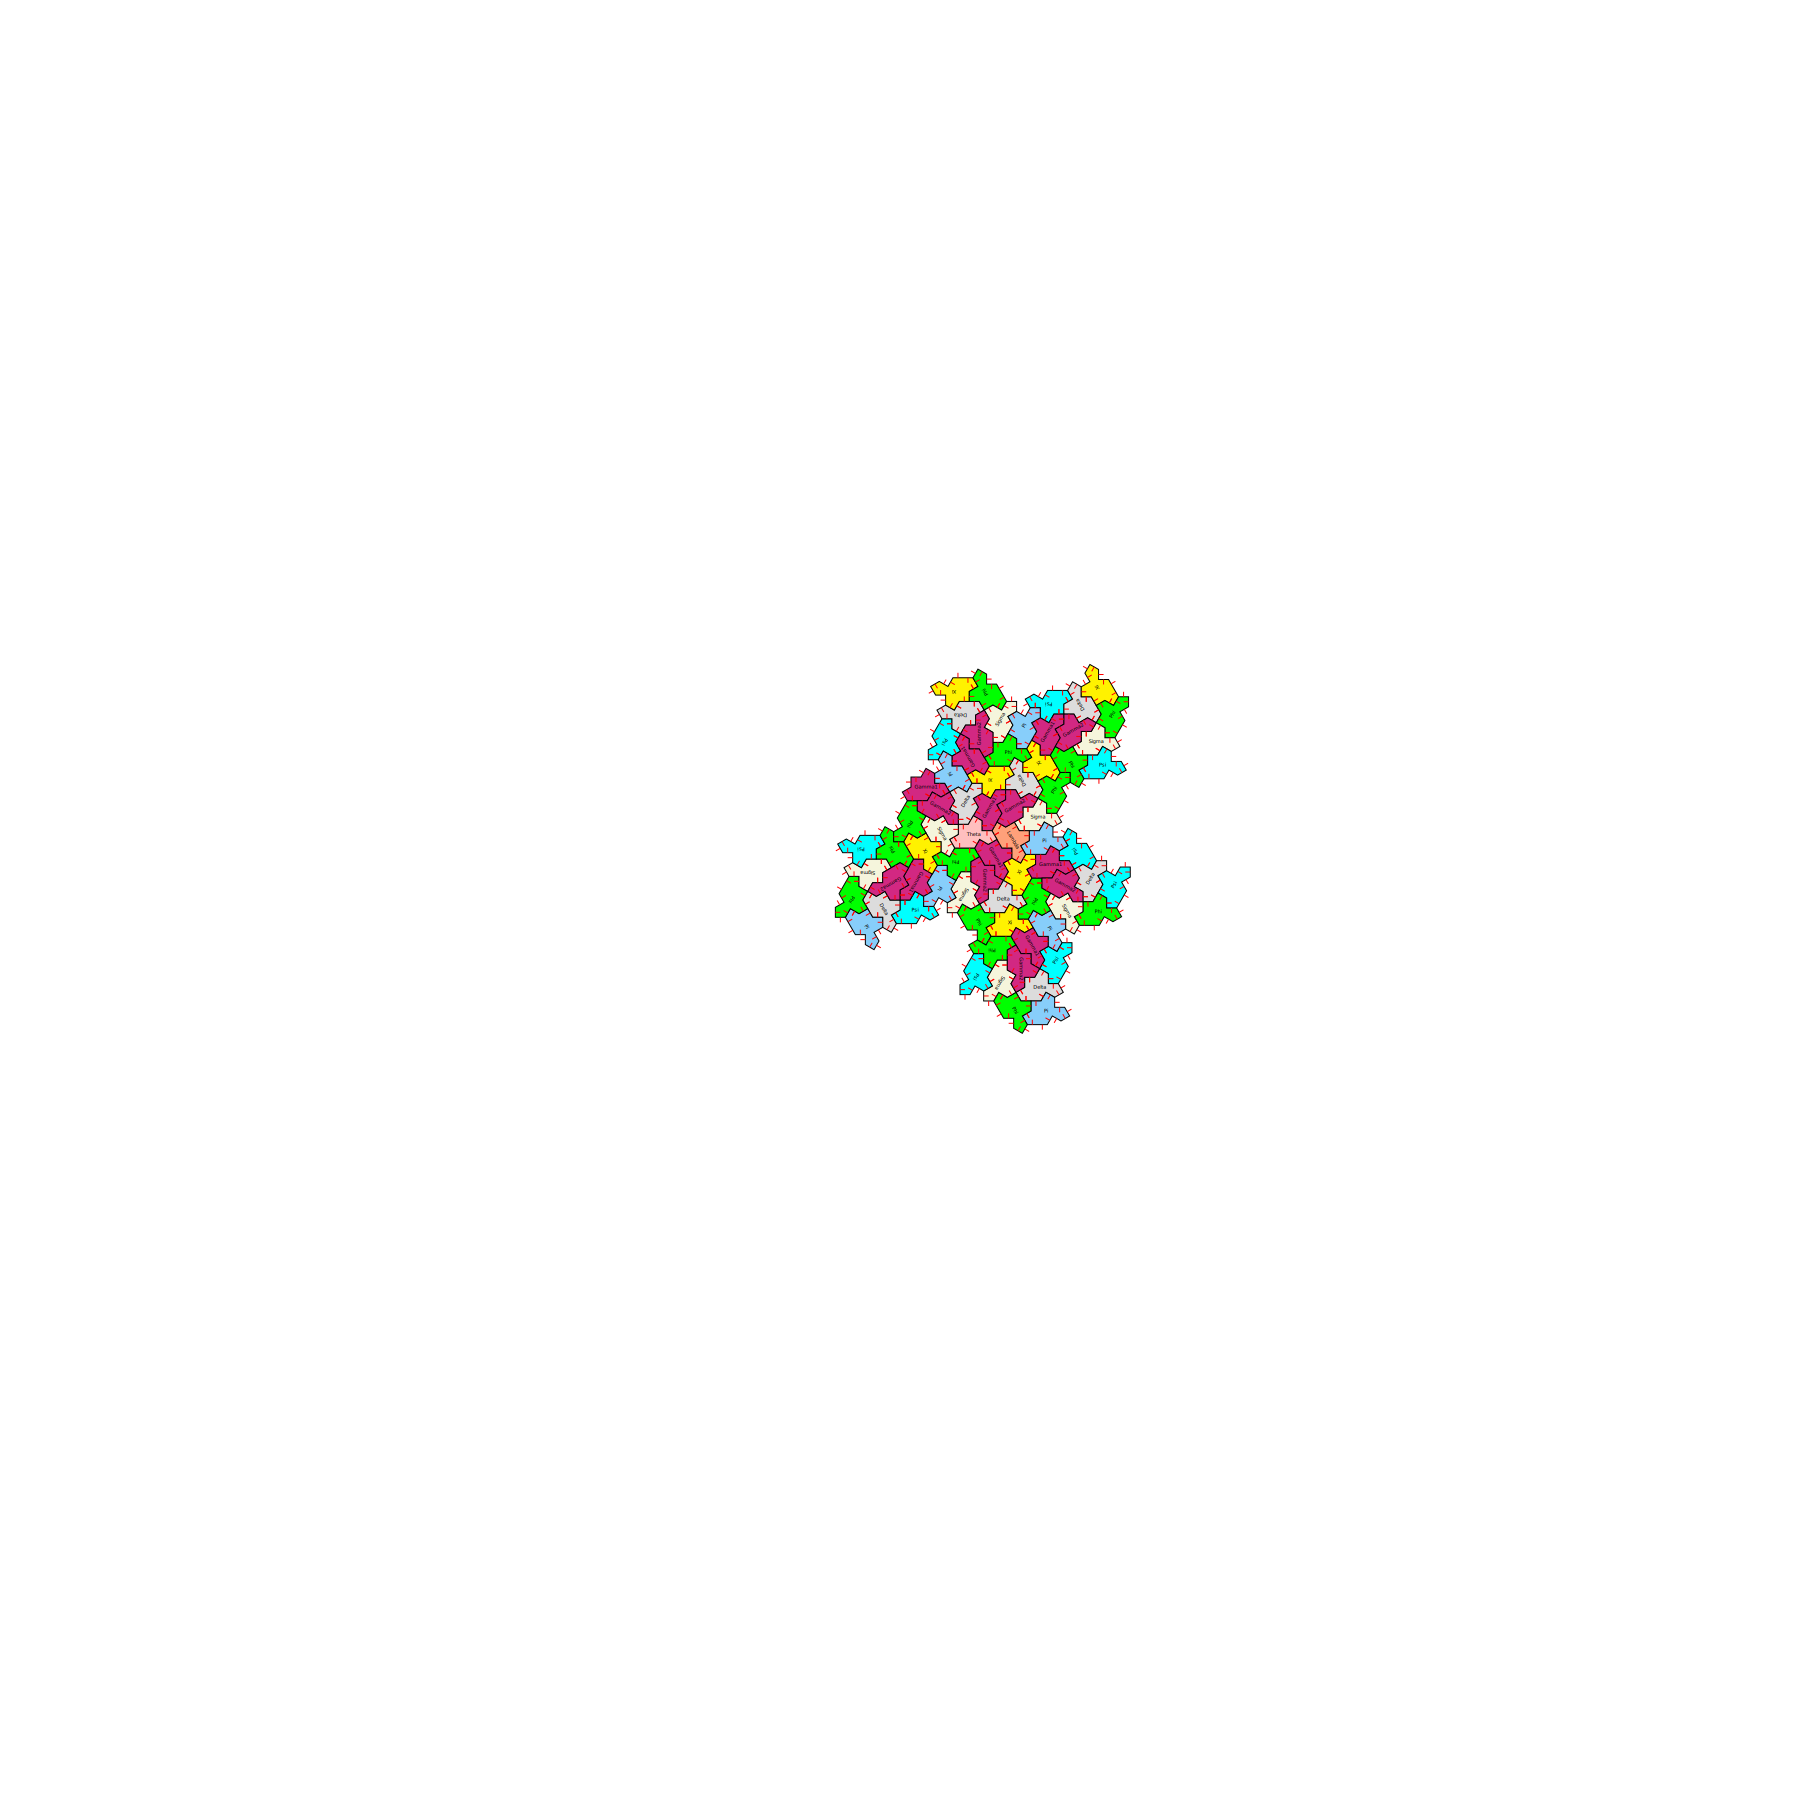

In [ ]:
# This uses spike from earlier.
d = draw.Drawing(1800, 1800, origin="center")
shapes["Sigma"].draw(d)
m = scale_drawing(d, scale_factor=10)
# save_drawing(m)
m